In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
import torch
import copy

try:
  import google.colab
  COLAB = True
  print("Note: Using Colab")
except:
  print("Note: Using Colab")
  COLAB = False


class EarlyStopping():
    def __init__(self, patience=5, min_delta=1e-2, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_model = None
        self.best_loss = None
        self.counter = 0
        self.status = ""

    def __call__(self, model, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
            self.best_model = copy.deepcopy(model)
        elif self.best_loss - val_loss > self.min_delta:
            self.best_model.load_state_dict(model.state_dict())
            self.best_loss = val_loss
            self.counter = 0
            # self.status = f"Improvement found, counter reset to {self.counter}"
        elif self.best_loss - val_loss < self.min_delta:
          self.counter += 1
          if self.counter >= self.patience:
            self.status = f"Stopped on {self.counter}"
            if self.restore_best_weights:
              model.load_state_dict(model.state_dict())
        else:
            self.counter += 1
            self.status = f"No improvement in the last {self.counter} epochs"
            if self.counter >= self.patience:
                self.status = f"Early stopping triggered after {self.counter} epochs."
                if self.restore_best_weights:
                    model.load_state_dict(self.best_model.state_dict())
                return True
        self.status = f"{self.counter}/{self.patience}"
        return False

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}" )

Note: Using Colab
Using device: cpu


In [ ]:
# Specify the path to your Excel file
excel_file_path_1 = "/content/Steel_data1.xlsx"
excel_file_path_2 = "/content/Steel_data2.xlsx"
excel_file_path_3 = "/content/Steel_data3.xlsx"
excel_file_path_4 = "/content/Steel_data4.xlsx"
excel_file_path_5 = "/content/Steel_data5.xlsx"

# Read the Excel file into a DataFrame
df_1 = pd.read_excel(excel_file_path_1)
df_2 = pd.read_excel(excel_file_path_2)
df_3 = pd.read_excel(excel_file_path_3)
df_4 = pd.read_excel(excel_file_path_4)
df_5 = pd.read_excel(excel_file_path_5)

In [ ]:
# Drop a particular column (e.g., 'B')
column_to_drop = 'σy (MPa)'
df_1 = df_1.drop(column_to_drop, axis=1)
df_2 = df_2.drop(column_to_drop, axis=1)
df_3 = df_3.drop(column_to_drop, axis=1)

# Concatenate the DataFrames vertically
result_df = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)
result_df = result_df.drop('Materials', axis=1)
result_df.reset_index(drop=True, inplace=True)
result_df = result_df.dropna()
# Now, 'result_df' contains the merged DataFrame
print(result_df)

     E (GPa)  σu (MPa)  σf (MPa)  RA (%)     εf   HB  σL (MPa)
0        197     783.2    1207.0    55.1  0.800  180     260.0
1        196     905.5    1247.0    41.7  0.540  195     311.7
2        211     821.0    1128.0    49.6  0.700  238     254.5
3        202     828.5    1065.0    34.1  0.416  220     360.2
4        220    2360.0    2115.0    14.7  0.160  536     796.1
..       ...       ...       ...     ...    ...  ...       ...
166      205     565.0     931.0    64.0  1.030  159     205.1
167      205     565.0    1000.0    69.0  1.190  150     196.6
168      205     440.0     752.0    65.0  1.060  150     210.5
169      205     530.0    1000.0    72.0  1.240  156     235.5
170      195     695.0    1220.0    68.0  1.150  225     330.5

[166 rows x 7 columns]


In [ ]:
#Standardize ranges
result_df['E (GPa)'] = zscore(result_df['E (GPa)'])
result_df['σu (MPa)'] = zscore(result_df['σu (MPa)'])
result_df['σf (MPa)'] = zscore(result_df['σf (MPa)'])
result_df['RA (%)'] = zscore(result_df['RA (%)'])
result_df['εf'] = zscore(result_df['εf'])
result_df['HB'] = zscore(result_df['HB'])
result_df['σL (MPa)'] = zscore(result_df['σL (MPa)'])

print(result_df)

      E (GPa)  σu (MPa)  σf (MPa)    RA (%)        εf        HB  σL (MPa)
0   -0.946005 -0.773748 -0.583093  0.393498  0.247490 -1.123611 -1.077348
1   -1.073160 -0.526618 -0.516289 -0.452444 -0.579648 -0.999848 -0.801932
2    0.834169 -0.697366 -0.715032  0.046283 -0.070640 -0.645060 -1.106647
3   -0.310228 -0.682211 -0.820249 -0.932233 -0.974129 -0.793576 -0.543564
4    1.978567  2.412473  0.933368 -2.156955 -1.788542  1.813702  1.778557
..        ...       ...       ...       ...       ...       ...       ...
166  0.071238 -1.214663 -1.044044  0.955355  0.979189 -1.296879 -1.369810
167  0.071238 -1.214663 -0.928806  1.271005  1.488197 -1.371137 -1.415091
168  0.071238 -1.467249 -1.342994  1.018485  1.074628 -1.371137 -1.341043
169  0.071238 -1.285387 -0.928806  1.460395  1.647262 -1.321632 -1.207864
170 -1.200315 -0.951973 -0.561382  1.207875  1.360945 -0.752321 -0.701781

[166 rows x 7 columns]


In [ ]:
#Converting to numpy
x_columns = result_df.columns.drop('σL (MPa)')
x = result_df[x_columns].values
y = result_df['σL (MPa)'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn import preprocessing
from torch.utils.data import DataLoader, TensorDataset
import tqdm
import time



class Net(nn.Module):
    def __init__(self, in_count, out_count):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_count, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, out_count)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


In [ ]:
#spilting into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.25, random_state = 42)

In [ ]:
#Numpy to torch tensor
x_train = torch.Tensor(x_train).float()
y_train = torch.Tensor(y_train).float()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
x_test = torch.Tensor(x_test).float().to(device)
y_test = torch.Tensor(y_test).float().to(device)


In [ ]:
#Create datasets
BATCH_SIZE = 16

dataset_train = TensorDataset(x_train, y_train)
dataloader_train = DataLoader(dataset_train, \
        batch_size = BATCH_SIZE, shuffle = True)

dataset_test = TensorDataset(x_test, y_test)
dataloader_test = DataLoader(dataset_test, \
        batch_size = BATCH_SIZE, shuffle = True)

In [ ]:
#Create Model
model = Net(x.shape[1], 1).to(device)
loss_fn = nn.MSELoss()

#Defining the optimizer
optimizer = torch.optim.Adam(model.parameters())
es = EarlyStopping()

epoch = 0
done = False
while epoch < 1000 and not done:
  epoch += 1
  steps = list(enumerate(dataloader_train))
  pbar = tqdm.tqdm(steps)
  model.train()

  for i, (x_batch, y_batch) in pbar:
    y_batch_pred = model(x_batch.to(device)).flatten()
    loss = loss_fn(y_batch_pred, y_batch.to(device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss, current = loss.item(), (i+1)* len(x_batch)
    if i == len(steps) - 1:
      model.eval()
      pred = model(x_test).flatten()
      vloss = loss_fn(pred, y_test)
      if es(model, vloss): done = True
      pbar.set_description(f"Epoch: {epoch}, tloss : {loss}, vloss: {vloss:>7f}, EStop: [{es.status}] ")
    else:
      pbar.set_description(f"Epoch: {epoch}, tloss : {loss}")




Epoch: 1, tloss : 0.4019167721271515, vloss: 0.480662, EStop: [0/5] : 100%|██████████| 8/8 [00:00<00:00, 67.55it/s]
Epoch: 2, tloss : 0.12824535369873047, vloss: 0.184652, EStop: [0/5] : 100%|██████████| 8/8 [00:00<00:00, 156.97it/s]
Epoch: 3, tloss : 0.180588960647583, vloss: 0.116215, EStop: [0/5] : 100%|██████████| 8/8 [00:00<00:00, 357.31it/s]
Epoch: 4, tloss : 0.09353452920913696, vloss: 0.102256, EStop: [0/5] : 100%|██████████| 8/8 [00:00<00:00, 344.86it/s]
Epoch: 5, tloss : 0.14426057040691376, vloss: 0.098194, EStop: [1/5] : 100%|██████████| 8/8 [00:00<00:00, 338.39it/s]
Epoch: 6, tloss : 0.13297364115715027, vloss: 0.110513, EStop: [2/5] : 100%|██████████| 8/8 [00:00<00:00, 238.24it/s]
Epoch: 7, tloss : 0.3055592477321625, vloss: 0.110786, EStop: [3/5] : 100%|██████████| 8/8 [00:00<00:00, 330.06it/s]
Epoch: 8, tloss : 0.16966454684734344, vloss: 0.095652, EStop: [4/5] : 100%|██████████| 8/8 [00:00<00:00, 317.59it/s]
Epoch: 9, tloss : 0.1284310668706894, vloss: 0.090815, EStop:

In [ ]:
from sklearn import metrics

#predict
pred = model(x_test)

#MEasure MSE Error
score_mse = metrics.mean_squared_error(pred.cpu().detach(), y_test.cpu())
print("Final score (MSE): {}".format(score_mse))

score_rmse = np.sqrt(metrics.mean_squared_error(pred.cpu().detach(), y_test.cpu().detach()))
print("Final score (RMSE): {}".format(score_rmse))

Final score (MSE): 0.07253359258174896
Final score (RMSE): 0.26932060718536377


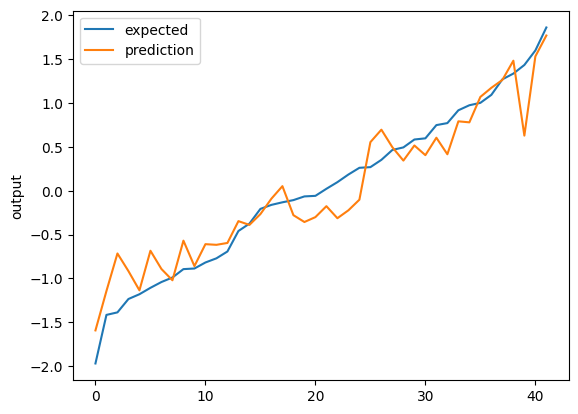

In [ ]:
#Regression Chart
def chart_regression(pred, y, sort = True):
  t = pd.DataFrame({'pred': pred, 'y' : y.flatten()})
  if sort:
    t.sort_values(by = ['y'], inplace= True)
  plt.plot(t['y'].tolist(), label = 'expected')
  plt.plot(t['pred'].tolist(), label = 'prediction')
  plt.ylabel('output')
  plt.legend()
  plt.show()

chart_regression(pred.flatten().cpu().detach() , y_test.cpu().detach())